<a href="https://colab.research.google.com/github/E-wave112/ml_proj1/blob/master/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2004-03-10 18:00:00
                              0     ...                 9356
Date                    10/03/2004  ...           04/04/2005
Time                      18.00.00  ...             14.00.00
CO(GT)                         2.6  ...                  2.2
PT08.S1(CO)                   1360  ...                 1071
NMHC(GT)                       150  ...                 -200
C6H6(GT)                      11.9  ...                 11.9
PT08.S2(NMHC)                 1046  ...                 1047
NOx(GT)                        166  ...                  265
PT08.S3(NOx)                  1056  ...                  654
NO2(GT)                        113  ...                  168
PT08.S4(NO2)                  1692  ...                 1129
PT08.S5(O3)                   1268  ...                  816
T                             13.6  ...                 28.5
RH                            48.9  ...                 13.1
AH                          0.7578  ...               0.5028
Date

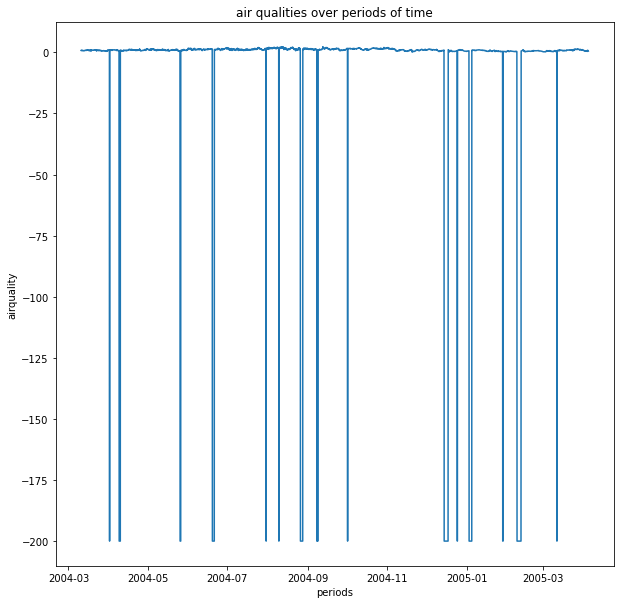

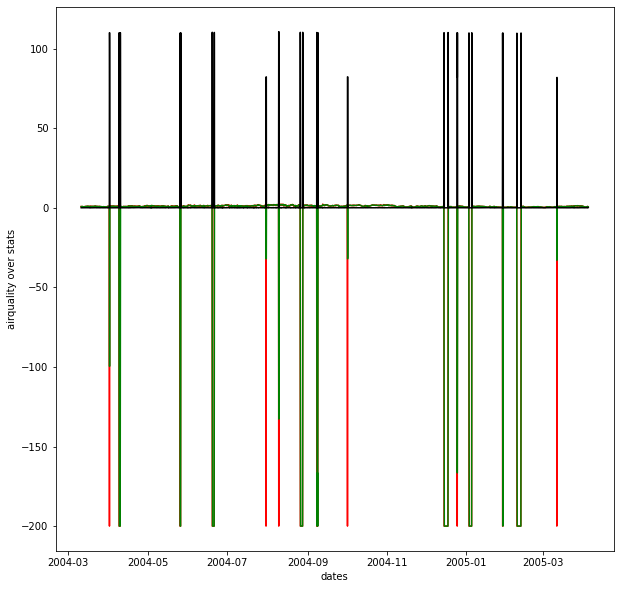

Test stats -11.234864232301147
p-value 1.868184675661298e-20
Crtical values {'1%': -3.431050181732143, '5%': -2.8618494362749733, '10%': -2.5669347078446885}
(-11.234864232301147, 1.868184675661298e-20, 14, 9342, {'1%': -3.431050181732143, '5%': -2.8618494362749733, '10%': -2.5669347078446885}, 72075.43339358641)

after implemeting a rolling mean problem
Test stats -21.36924459493229
p-value 0.0
Crtical values {'1%': -3.4310513080984597, '5%': -2.861849933999267, '10%': -2.566934972785317}
(-21.36924459493229, 0.0, 24, 9327, {'1%': -3.4310513080984597, '5%': -2.861849933999267, '10%': -2.566934972785317}, 68763.21442471619)


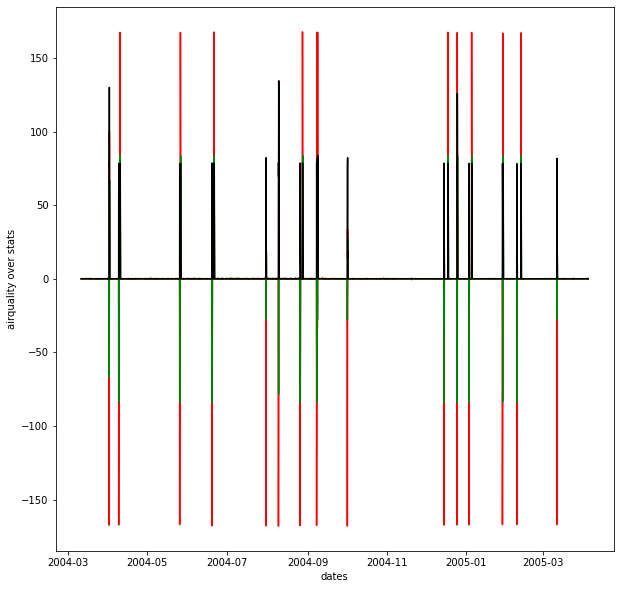

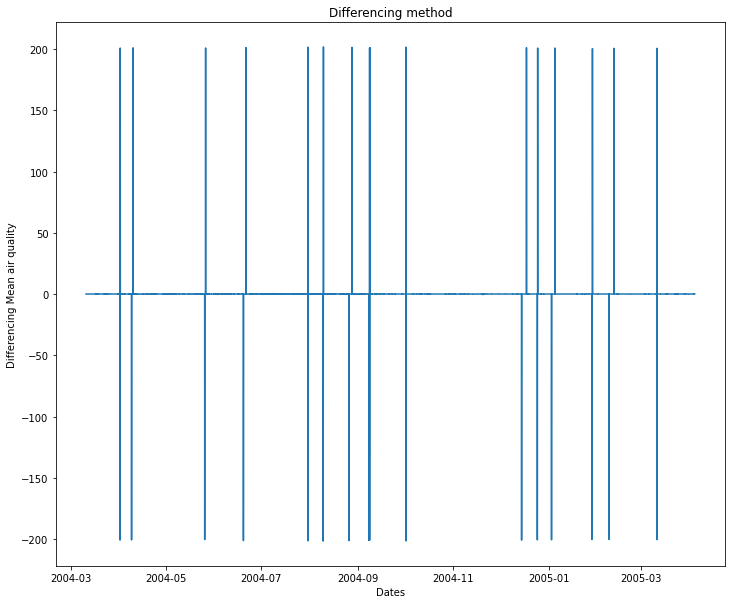

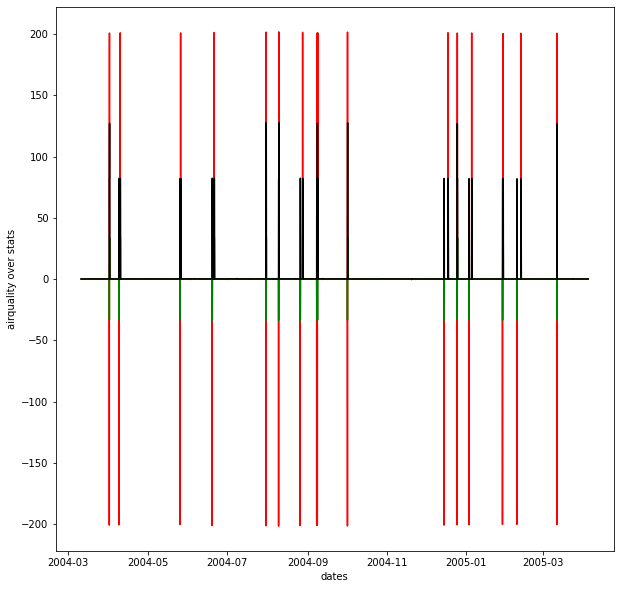

Test stats -23.190506202020643
p-value 0.0
Crtical values {'1%': -3.431050932240579, '5%': -2.861849767913357, '10%': -2.5669348843771203}
(-23.190506202020643, 0.0, 23, 9332, {'1%': -3.431050932240579, '5%': -2.861849767913357, '10%': -2.5669348843771203}, 72184.18457186269)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


2004-03-10 19:00:00   -0.000956
2004-03-10 20:00:00    0.002967
2004-03-10 21:00:00   -0.003717
2004-03-10 22:00:00   -0.005199
2004-03-10 23:00:00   -0.002298
                         ...   
2005-04-04 11:00:00   -0.482960
2005-04-04 12:00:00   -0.475757
2005-04-04 13:00:00   -0.469802
2005-04-04 14:00:00   -0.458627
2005-04-04 15:00:00   -0.468926
Freq: H, Length: 9357, dtype: float64


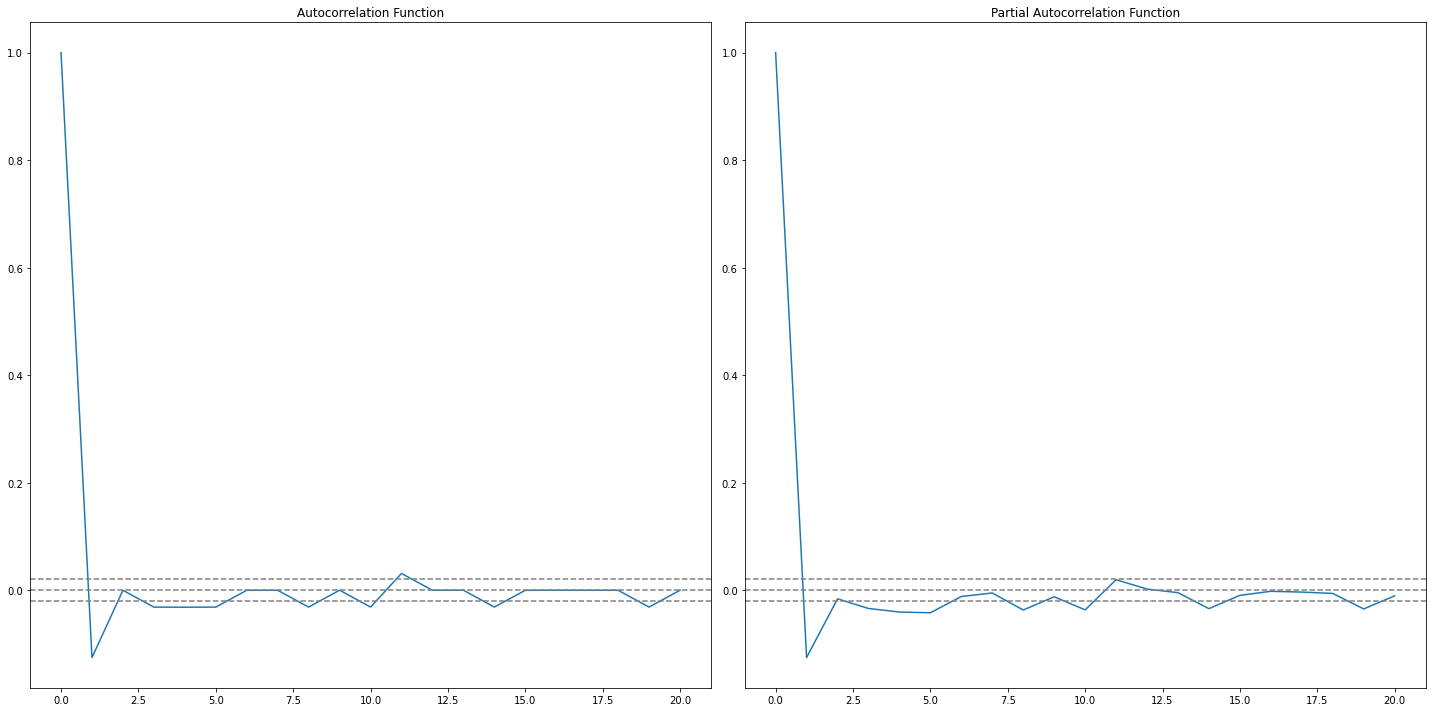

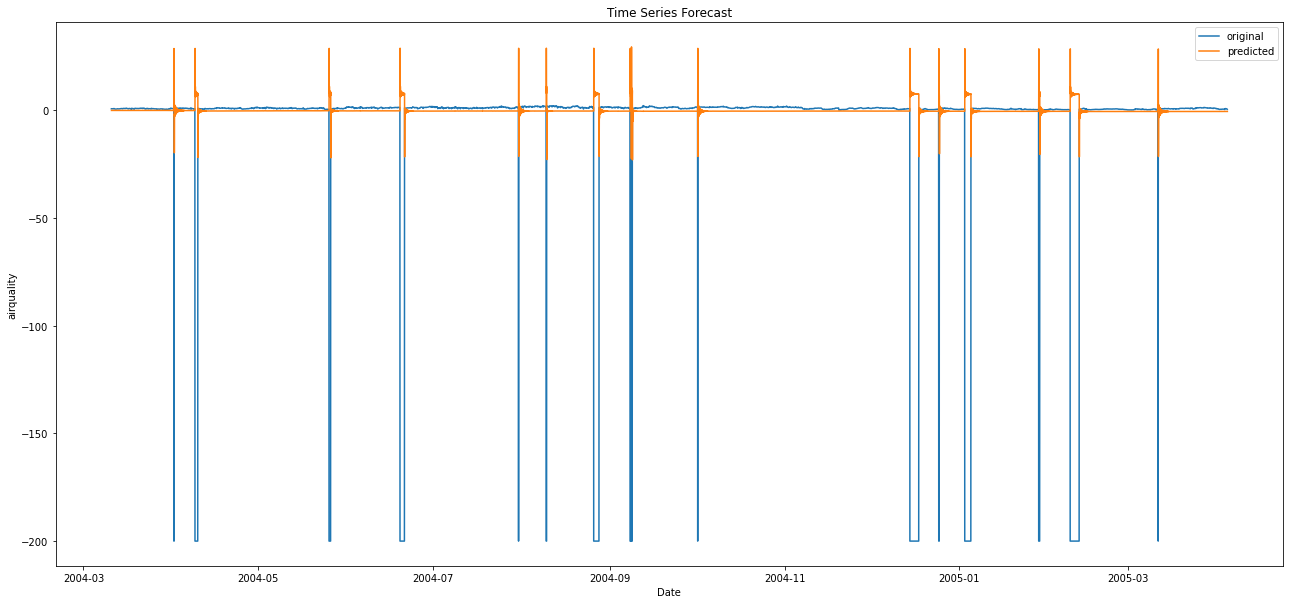

41.318563294913474


In [32]:
%matplotlib inline
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
import datetime
import numpy as np
import statsmodels
from statsmodels.tsa.stattools import adfuller,acf,pacf
from sklearn.metrics import mean_squared_error
##load data
start = time.time()
df = pd.read_csv('/content/drive/MyDrive/AirQualityUCI.csv',sep=';',decimal=',')
df = df.iloc[:, 0:15]
df = df[df['Date'].notnull()]
df['Datetime'] = df['Date'] + ' ' + df['Time']
df['Datetime'] = df['Datetime'].apply(lambda x: datetime.datetime.strptime(x,'%d/%m/%Y %H.%M.%S'))
print((df.Datetime[0]))
print(df.T)


##before handling outliers
print(df.shape)
##after handling outliers
df.drop(['NMHC(GT)','CO(GT)','NO2(GT)','NOx(GT)'],1,inplace=True)
corre = df.corr()
plt.figure(figsize=(10,10))
plt.plot(df.Datetime,df.AH)
plt.title('air qualities over periods of time')
plt.xlabel('periods')
plt.ylabel('airquality')
plt.show()
##create a timeseries for the predictor:air quality

time_series = df.loc[:,['Datetime','AH']]
time_series.index = time_series.Datetime
ts = time_series.drop('Datetime',axis=1)
##perform dickey fuller test to ascertain the stationarity of a time series data
def check_adfuller(ts):
    result = adfuller(ts,autolag='AIC')
    print('Test stats',result[0])
    print('p-value',result[1])
    print('Crtical values',result[4])
    print(result)
##check mean_std

def mean_std(ts):
    #rolling stats
    rol_mean = ts.rolling(6).mean()
    rol_std = ts.rolling(6).std()
    ##visualize these stats
    plt.figure(figsize = (10,10))
    orig = plt.plot(ts,color='red',label='Original')
    mean = plt.plot(rol_mean,color='green',label='rolling mean')
    std_dev = plt.plot(rol_std,color='black',label='rolling dev')
    plt.xlabel('dates')
    plt.ylabel('airquality over stats')
    plt.show()
    
mean_std(ts)
check_adfuller(ts.AH)
##validate the mean trend problem by creating a mean_shift
moving_avg = ts.rolling(6).mean()
# plt.figure(figsize = (10,10))
# orig = plt.plot(ts,color='red',label='Original')
# mean = plt.plot(moving_avg, color='green', label='rolling average mean')
# plt.xlabel('time_dates')
# plt.ylabel('average rolling air quality')
# plt.show()


##sift the index time series by the moving average
print('\nafter implemeting a rolling mean problem')
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True)
check_adfuller(ts_moving_avg_diff.AH)
mean_std(ts_moving_avg_diff)
##differencing method to avoid trend or seasonality
ts_diff = ts - ts.shift()
ts_diff.dropna(inplace=True)
plt.figure(figsize=(12,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Dates")
plt.ylabel("Differencing Mean air quality")
plt.show()
mean_std(ts_diff)
check_adfuller(ts_diff.AH)

##visualize an autocorrelative function and partial autocorrelative function in order to chooose the optimal p,d,q parameters
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(20,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

split = len(df) - int(0.2*len(df))
train, test = df['T'][0:split], df['T'][split:]
##predictive modelling with ARIMA
ar_model = ARIMA(ts_diff, order = (5,0,2))
ar_model_fit = ar_model.fit(disp=0)
# predict

# start_index = datetime(2004,3,10,18)
# end_index = datetime(2005,4,4,14)
forecast = ar_model_fit.predict(start=0, end=9356)
print(forecast)

#visualization
plt.figure(figsize=(22,10))
plt.plot(df.Datetime,df.AH,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("airquality")
plt.legend()
plt.show()

##metrics
print(np.sqrt(mean_squared_error(ts_diff,forecast)))